In [1]:
 # Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/Loan Status Prediction/Loan Data.csv')

In [ ]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
3,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
4,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0


In [ ]:
df.shape

(48552, 19)

In [ ]:
# To see the column data types and non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48552 entries, 0 to 48551
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       48552 non-null  object 
 1   Customer ID                   48552 non-null  object 
 2   Loan Status                   48552 non-null  object 
 3   Current Loan Amount           48552 non-null  int64  
 4   Term                          48552 non-null  object 
 5   Credit Score                  38615 non-null  float64
 6   Annual Income                 38615 non-null  float64
 7   Years in current job          46294 non-null  object 
 8   Home Ownership                48552 non-null  object 
 9   Purpose                       48552 non-null  object 
 10  Monthly Debt                  48552 non-null  float64
 11  Years of Credit History       48552 non-null  float64
 12  Months since last delinquent  22652 non-null  float64
 13  N

In [ ]:
df.describe()
# Statistics for each column

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,4.855200e+04,38615.000000,3.861500e+04,48552.000000,48552.000000,22652.000000,48552.000000,48552.000000,4.855200e+04,4.855000e+04,48452.000000,48549.000000
mean,8.221053e+06,1468.589952,1.344077e+06,18533.954184,18.077886,34.660913,11.166625,0.169859,2.919254e+05,7.327262e+05,0.117704,0.030382
std,2.693544e+07,2064.545749,1.222846e+06,12205.326281,7.037875,22.098585,5.025555,0.483336,3.722025e+05,7.700471e+06,0.351603,0.262615
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.793825e+05,705.000000,8.301860e+05,10306.645000,13.300000,16.000000,8.000000,0.000000,1.146032e+05,2.704680e+05,0.000000,0.000000
50%,3.037430e+05,725.000000,1.150146e+06,16305.230000,16.800000,31.000000,10.000000,0.000000,2.116505e+05,4.598110e+05,0.000000,0.000000
75%,4.813600e+05,742.000000,1.611067e+06,24040.367500,21.500000,51.000000,14.000000,0.000000,3.672130e+05,7.609360e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,65.000000,176.000000,76.000000,15.000000,3.287897e+07,1.304726e+09,7.000000,15.000000


In [4]:
#dropping unwanted columns
df.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

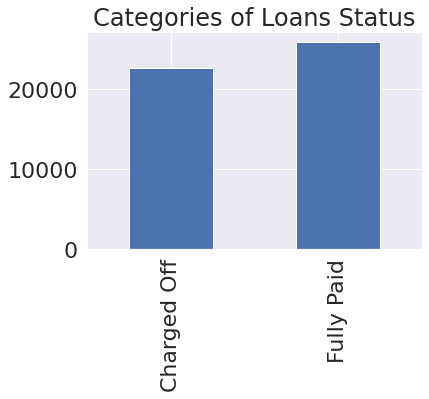

In [5]:
df['Loan Status'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Categories of Loans Status')

In [ ]:
df['Loan Status'].value_counts()

Fully Paid     25913
Charged Off    22639
Name: Loan Status, dtype: int64

In [6]:
# Function to calculate missing values by column
def missing_values_table(df_1):
        # Total missing values
        mis_val = df_1.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df_1.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,25900,53.3
Credit Score,9937,20.5
Annual Income,9937,20.5
Years in current job,2258,4.7
Bankruptcies,100,0.2
Tax Liens,3,0.0
Maximum Open Credit,2,0.0


In [8]:
# Drop the columns with > 50% missing
df.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [13]:
# As the number of missing values is so low in the 'Maximum Open Credit' I will drop them.

for i in df['Maximum Open Credit'][df['Maximum Open Credit'].isnull() == True].index:
    df.drop(labels=i, inplace=True)
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,2258,4.7


In [14]:
# As the number of missing values is so low in the 'Tax Liens' I will drop them.

for i in df['Tax Liens'][df['Tax Liens'].isnull() == True].index:
    df.drop(labels=i, inplace=True)
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,2258,4.7


In [15]:
# As the number of missing values is so low in the 'Bankruptcies' I will drop them.

for i in df['Bankruptcies'][df['Bankruptcies'].isnull() == True].index:
    df.drop(labels=i, inplace=True)
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,2258,4.7


In [16]:
# Now I will use the 'mean' technique to fill the NaN values.

df.fillna(df.mean(), inplace=True)
missing_values_table(df)

# The feature 'Years in current job' didn't fill because has categorical values.

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,2258,4.7


In [17]:
df.fillna('10+ years', inplace=True) # fill with '10+ years'.
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


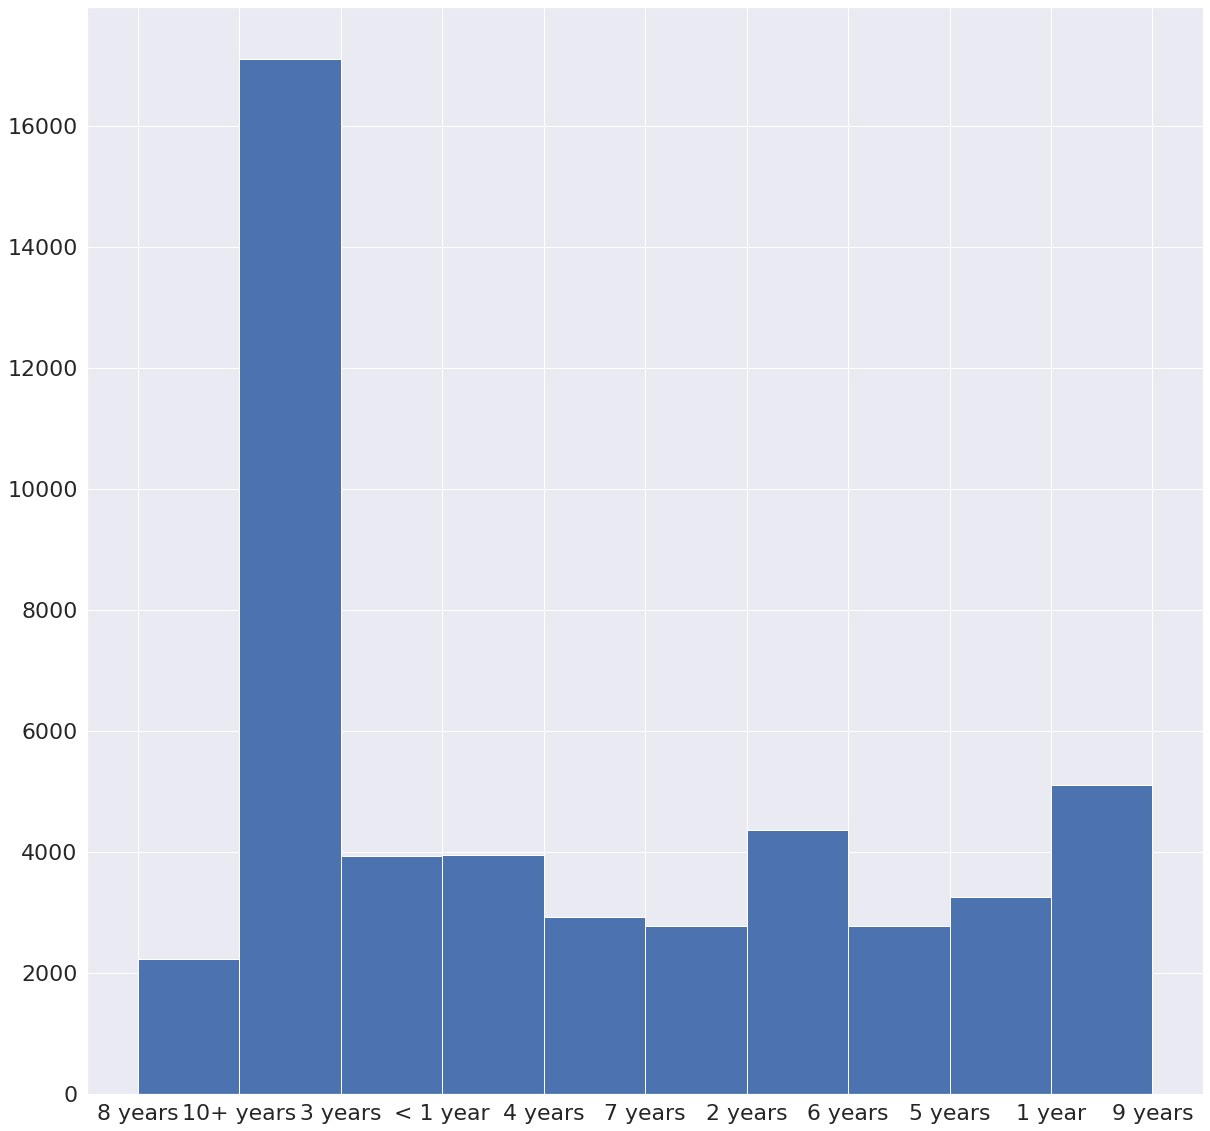

In [ ]:
df['Years in current job'].hist(figsize=(20,20))

In [18]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = df.corr()['Credit Score'].sort_values(ascending=False)

# Print the correlations
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.006388
Tax Liens                    0.005984
Current Credit Balance       0.002465
Monthly Debt                -0.002489
Maximum Open Credit         -0.002640
Number of Credit Problems   -0.003221
Bankruptcies                -0.007320
Years of Credit History     -0.008646
Annual Income               -0.012419
Current Loan Amount         -0.118223
Name: Credit Score, dtype: float64>


In [19]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = df[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

df.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
df = pd.concat([df, categorical_subset], axis = 1)

In [20]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Loan Status'] = y
               
    return x

In [21]:
df = remove_collinear_features(df, 0.6);

In [22]:
# Separate out the features and targets
features = df.drop(columns='Loan Status')
targets = pd.DataFrame(df['Loan Status'])

In [23]:

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(38760, 42)
(9690, 42)
(38760, 1)
(9690, 1)


In [24]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Gradient Boosting
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn import metrics
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train,scoring='accuracy', cv = 10)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    print(metrics.confusion_matrix(y_test, model_pred))
    
    
    # Return the performance metric
    return model_cross

In [27]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

[[2376 2080]
 [1118 4116]]
Logistic Regression Performance on the test set: Cross Validation Score = 0.6614


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

[[2552 1904]
 [1653 3581]]
KNN Performance on the test set: Cross Validation Score = 0.6209


In [29]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

[[2934 1522]
 [1832 3402]]
Random Forest Performance on the test set: Cross Validation Score = 0.6535


In [30]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

[[2419 2037]
 [1038 4196]]
Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.6763


In [31]:
from sklearn.svm import SVC
SVM = SVC(gamma='scale', kernel ='rbf')
SVM_Cross = fit_and_evaluate(SVM)
print('SVM Classification Performance on the test set: Cross Validation Score = %0.4f' % SVM_Cross)

[[2093 2363]
 [ 871 4363]]
SVM Classification Performance on the test set: Cross Validation Score = 0.6550


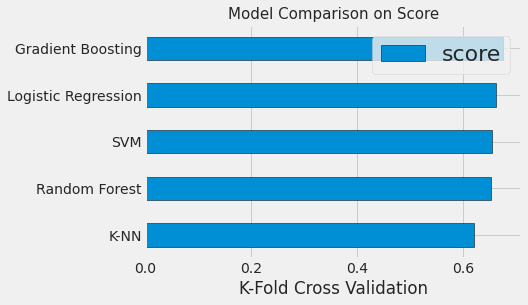

In [32]:
plt.style.use('fivethirtyeight')
figsize=(10, 8)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'K-NN',
                                           'SVM', 'Random Forest',
                                            'Gradient Boosting'],
                                 'score': [logr_cross, knn_cross, SVM_Cross, 
                                         random_cross, gb_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                             edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 15);